<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Selection of features for practice

After loading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
data = pd.read_csv("train.csv")
data.head()
data.shape
data.loc[:,["GrLivArea","YearBuilt","SalePrice"]]

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[Problem 2] Estimation and evaluation by linear regression

Easily analyze and preprocess data, create and execute a series of flows from learning, estimation, evaluation, and visualization by linear regression .

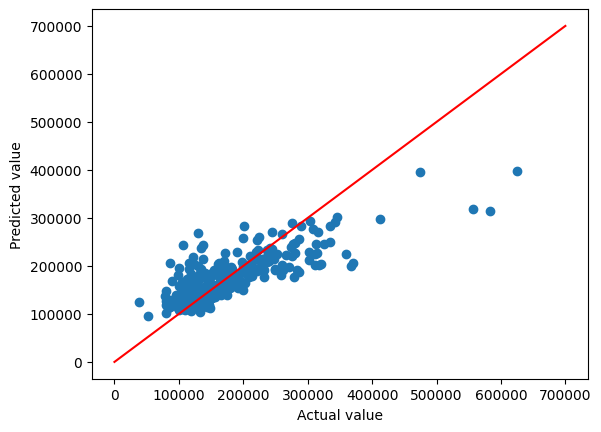

In [8]:
x = data.loc[:,["GrLivArea"]]
y = data.loc[:,["SalePrice"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123) #random state-ene randomor random hiihed yg l ene randomoor ajillana. Tuhain uyd sanamsargui uussen tuluviig hadgalah 

lr = LinearRegression()
lr.fit(x_train,y_train)
predicted_value = lr.predict(x_test)

plt.scatter(y_test, predicted_value)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [9]:
mean_squared_error(y_test, predicted_value)

2553792703.6931477

[Problem 3] Comparison of methods

Please learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Briefly discuss the results using the table and visualization. Please state which method was good for which index value and what kind of figure it was.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

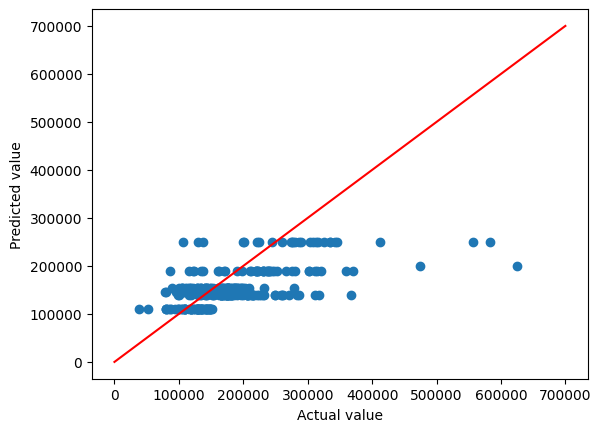

In [14]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
pred_SVM = clf.predict(x_test)

plt.scatter(y_test, pred_SVM)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show

In [15]:
mean_squared_error(y_test, pred_SVM)

4606863189.44863

Decision tree

<function matplotlib.pyplot.show(close=None, block=None)>

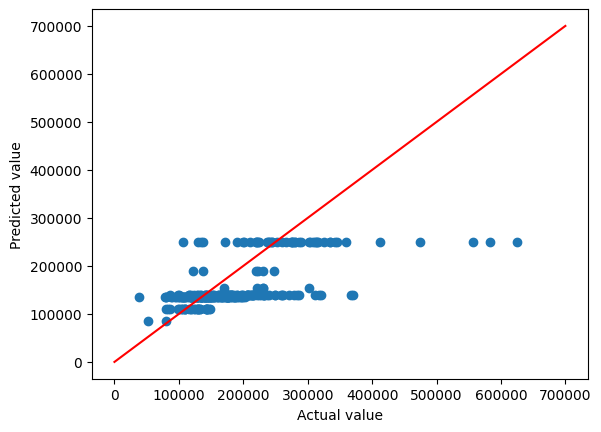

In [18]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)
pred_DT = tree.predict(x_test)


plt.scatter(y_test, pred_DT)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show

In [19]:
mean_squared_error(y_test, pred_DT)

4480033668.900685

Random forest

<ipython-input-22-88361ea72915>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


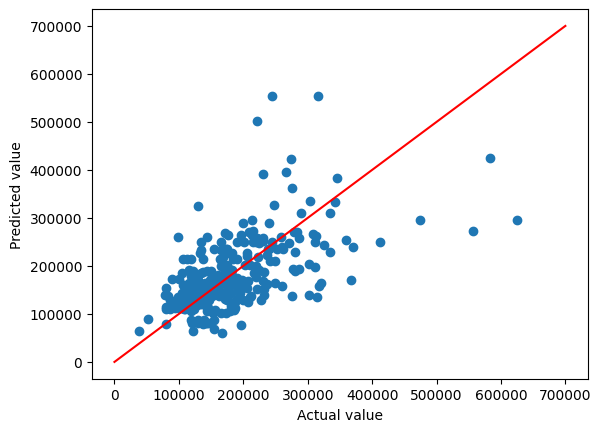

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(x_train, y_train)
pred_forest = forest.predict(x_test)

plt.scatter(y_test, pred_forest)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [23]:
mean_squared_error(y_test, pred_forest)

4969252516.684932

[Problem 4] (Advanced task) Learning using other feature values

0
0
0
0
Feature added: root mean square error:1788152399.389184
Feature added: root mean square error:42286.55104627456


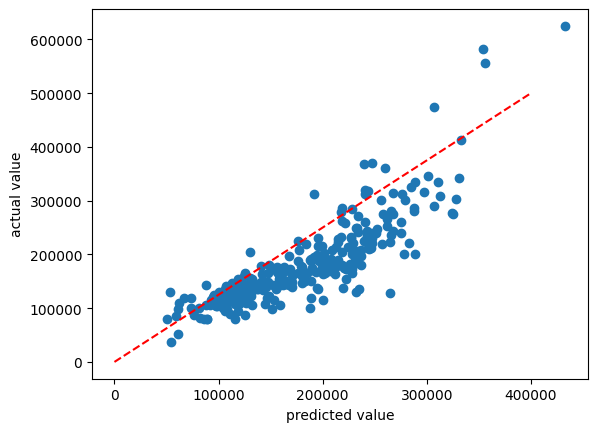

In [27]:
data = data.loc[:,['GrLivArea', 'YearBuilt' , 'LotArea','SalePrice']]

print(data.loc[:,'GrLivArea'].isnull().sum())
print(data.loc[:,'YearBuilt'].isnull().sum())
print(data.loc[:,'SalePrice'].isnull().sum())
print(data.loc[:,'LotArea'].isnull().sum())

x = data.loc[:,['GrLivArea', 'YearBuilt', 'LotArea']].to_numpy()
y = data.loc[:, 'SalePrice'].to_numpy()
# Estimation and evaluation by linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Feature added: root mean square error:{}".format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print("Feature added: root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()